## Programming Lab #2
## Foundations of Machine Learning

The purpose of this project is to build predictive algorithms that predict the likelihood a person has a stroke. The data include:
  
  - `age`: Patient age, numeric
  - `avg_glucose_level`: Blood sugar levels, numeric
  - `bmi`: Body mass index, numeric
  - `ever_married`: Ever married, dummy/character (Yes, No)
  - `gender`: Male, Female, or Other, character
  - `heart_disease`: Has heart disease, dummy
  - `hypertension`: Has hypertension, dummy
  - `id`: Study identification number
  - `Residence_type`: Type of residence, dummy/character (Urban, Rural)
  - `smoking_status`: Former, never, or current smoker, categorical
  - `work_type`: Employment type (Never worked (Never_worked), homemaker ("children"), Public sector employment (Govt_job), Private sector employment (`Private`), Self-employed (`Self-employed`)
  - `stroke`: Suffered a stroke in the sample period
  
The data come in two files: `training_data.csv`, which you should use to build your models, and `testing_data.csv`, which you should use to test your models. The models must be trained on the training data and tested on the testing data, but providing both files allows you to experiment with your choices and iterate on model designs. If performance drops on the testing data, you know there's a problem.
  
You can use any of the tools presented in class: $k$ nearest neighbor, linear models, or decision trees. In principle, $k$ means clustering might also be helpful for looking for patterns in the data that the other methods might miss. Using canned versions of more advanced tools (boosting, bagging, random forests, neural networks, etc.) is deeply unsporting and thus not allowed. You can be creative about transforming variables, or combining decision trees with linear models or $k$NN. Try something interesting. Fail extravagantly. The goal is to work on an intellectually interesting question that is similar to the tasks that data scientists are called on to do every day.
  
We will compare the groups' models to see if there are common trends or significant differences, and also to declare **The Winners** on the basis of whichever team achieves the lowest $RMSE$ on the testing data. A simple linear model with some polynomials and dummy variables achieves an $R^2$ of .087 and a $RMSE$ of .206.

In [ ]:
import pandas as pd
import numpy as np
df_train = pd.read_csv('https://raw.githubusercontent.com/DS3001/group22/main/project_2/data/training_data.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/DS3001/group22/main/project_2/data/testing_data.csv')

y_train = df_train['stroke']
X_train = df_train.drop('stroke',axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke',axis=1)

X_train['bmi'] = X_train['bmi'].fillna(X_train['bmi'].mean())
X_test['bmi'] = X_test['bmi'].fillna(X_test['bmi'].mean())

In [ ]:
## Linear Model
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

X_train_numeric = X_train.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
#
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_train_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
#
dummies = pd.concat([ pd.get_dummies(X_train['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['smoking_status'],dtype='int',drop_first=True)],axis=1)
#
Z_train = pd.concat([continuous,dummies],axis=1)

X_test_numeric = X_test.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
#
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_test_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

dummies = pd.concat([ pd.get_dummies(X_test['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['smoking_status'],dtype='int',drop_first=True)],axis=1)
#
Z_test = pd.concat([continuous,dummies],axis=1)

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(Z_train, y_train) # Fit the linear model
print('R2: ', reg.score(Z_test, y_test)) # R squared measure
y_hat = reg.predict(Z_test)
N = len(y_test)
print('RMSE: ', (np.sum( (y_test - y_hat)**2)/N )**.5 )   # R squared measure


R2:  0.08717964343852191
RMSE:  0.20599583849612824


This is supposed to be fairly "fun," so please do not turn it into a combinatorial nightmare of comparing thousands of model specifications. Settle on a strategy you think is promising, crank it out, and write up the results. Your time and energy are valuable, so learn to recognize when the marginal cost of another twenty minutes on a project exceeds the benefit in terms of improving the results and your grade.
  
## Paper format

The format of the paper should be:

  - Summary: A one paragraph description of the question, methods, and results (about 350 words).
  - Data: One to two pages discussing the data and key variables, and any challenges in reading, cleaning, and preparing them for analysis.
  - Results: Two to five pages providing visualizations, statistics, a discussion of your methodology, and a presentation of your main findings.
  - Conclusion: One to two pages summarizing the project, defending it from criticism, and suggesting additional work that was outside the scope of the project.
  - Appendix: If you have a significant number of additional plots or table that you feel are essential to the project, you can put any amount of extra content at the end and reference it from the body of the paper.

## Submission

Half of each student's grade is based on their commits to the repo. Each student is expected to do something specific that contributes to the overall project outcome. Since commits are recorded explicitly by Git/GitHub, this is observable. A student can contribute by cleaning data, creating visualizations,performing analytic analyses,  or writing about results, but everyone has to do something substantial. A student's work doesn't need to make it into the final report to be valuable and substantial, and fulfill the requirement to make a contribution to the project.

The other half of each student's grade is based on the written report. Groups will work together on combining results and writing up findings in a Jupyter noteb,ok, using code chunks to execute Python commands and markdown chunks to structure the paper and provide exposition. The notebook should run on Colab or Rivana from beginning to end without any errors.

mbers submit.

## Criteria

The project is graded based on four criteria:

  - Project Concept: What is the strategy for building and testing the group's models? How did the group decide how to use the tools presented so far in class? How did the group compare the performance of the options considered, and settle on a final choice for submission?
  - Wrangling, EDA, and Visualization: How are are missing values handled? For variables with large numbers of missing values, to what extent do the data and documentation provide an explanation for the missing data? If multiple data sources are used, how are the data merged? For the main variables in the analysis, are the relevant data summarized and visualized through a histogram or kernel density plot where appropriate? Are basic quantitative features of the data addressed and explained? How are outliers characterized and addressed?
  - Analysis: What are the groups' main findings? Do the tables, plots, and statistics support the conclusions? Is the research strategy carried out correctly? If the research strategy succeeds, are the results interpreted correctly and appropriately? If the research strategy fails, is a useful discussion of the flaws of the data collection process or the research strategy discussed?
  - Replication/Documentation: Is the code appropriately commented? Can the main results be replicated from the code and original data files? Are significant choices noted and explained?

Each of the four criteria are equally weighted (25 points out of 100).

# **Data Wrangling**

# age

In [ ]:
var = 'age'
df_train[var].unique()

array([3.60e+01, 4.50e+01, 5.80e+01, 6.10e+01, 7.80e+01, 3.40e+01,
       3.70e+01, 6.30e+01, 7.20e+01, 5.90e+01, 2.60e+01, 4.60e+01,
       1.70e+01, 2.90e+01, 1.60e+01, 4.40e+01, 7.90e+01, 7.30e+01,
       3.00e+01, 5.00e+00, 3.20e-01, 1.30e+01, 2.20e+01, 8.00e+01,
       6.20e+01, 6.70e+01, 5.60e+01, 1.10e+01, 4.00e+01, 2.40e-01,
       9.00e+00, 6.00e+01, 7.40e+01, 2.80e+01, 5.10e+01, 5.20e+01,
       3.20e+01, 2.50e+01, 8.20e+01, 3.50e+01, 2.30e+01, 4.70e+01,
       5.50e+01, 2.70e+01, 6.00e+00, 3.30e+01, 4.90e+01, 5.30e+01,
       4.20e+01, 5.70e+01, 6.60e+01, 7.10e+01, 1.60e-01, 5.40e+01,
       3.00e+00, 7.00e+00, 6.40e+01, 4.30e+01, 3.10e+01, 2.10e+01,
       6.50e+01, 1.80e+01, 4.10e+01, 8.10e+01, 1.00e+00, 2.40e+01,
       3.90e+01, 7.00e+01, 2.00e+00, 4.80e+01, 8.00e-02, 3.80e+01,
       7.50e+01, 1.88e+00, 1.00e+01, 1.20e+01, 6.40e-01, 2.00e+01,
       5.00e+01, 7.70e+01, 1.90e+01, 1.08e+00, 8.00e+00, 6.90e+01,
       6.80e+01, 1.40e+01, 4.00e+00, 7.60e+01, 1.16e+00, 1.80e

In [ ]:
df_test[var].unique()

array([58.  ,  8.  , 70.  , 47.  , 74.  , 79.  , 40.  , 35.  , 44.  ,
       71.  , 23.  , 69.  , 21.  , 78.  , 24.  , 60.  , 66.  , 52.  ,
       34.  , 57.  , 41.  , 56.  ,  0.88, 25.  , 39.  , 31.  , 61.  ,
       22.  , 42.  , 33.  , 68.  , 26.  , 43.  , 53.  , 55.  , 64.  ,
       38.  ,  5.  , 54.  , 72.  , 51.  , 20.  , 65.  , 16.  , 46.  ,
       67.  , 18.  ,  1.08,  1.8 , 80.  , 37.  ,  9.  , 28.  , 10.  ,
       82.  ,  2.  , 32.  , 30.  , 45.  , 50.  ,  6.  , 73.  , 27.  ,
       63.  , 59.  , 29.  , 36.  ,  1.  , 48.  ,  1.4 , 19.  ,  1.72,
       77.  , 75.  , 15.  , 49.  , 14.  , 81.  ,  1.64, 13.  , 11.  ,
       62.  , 76.  ,  4.  , 12.  ,  7.  ,  1.48,  0.24,  0.64,  0.48,
        3.  ,  1.24, 17.  ,  1.16,  0.56,  0.72,  0.16,  1.32,  0.32])

In [ ]:
df_train[var] = df_train[var].round().astype(int)
df_test[var] = df_test[var].round().astype(int)


In [ ]:
df_train[var].unique()

array([36, 45, 58, 61, 78, 34, 37, 63, 72, 59, 26, 46, 17, 29, 16, 44, 79,
       73, 30,  5,  0, 13, 22, 80, 62, 67, 56, 11, 40,  9, 60, 74, 28, 51,
       52, 32, 25, 82, 35, 23, 47, 55, 27,  6, 33, 49, 53, 42, 57, 66, 71,
       54,  3,  7, 64, 43, 31, 21, 65, 18, 41, 81,  1, 24, 39, 70,  2, 48,
       38, 75, 10, 12, 20, 50, 77, 19,  8, 69, 68, 14,  4, 76, 15])

In [ ]:
df_test[var].unique()

array([58,  8, 70, 47, 74, 79, 40, 35, 44, 71, 23, 69, 21, 78, 24, 60, 66,
       52, 34, 57, 41, 56,  1, 25, 39, 31, 61, 22, 42, 33, 68, 26, 43, 53,
       55, 64, 38,  5, 54, 72, 51, 20, 65, 16, 46, 67, 18,  2, 80, 37,  9,
       28, 10, 82, 32, 30, 45, 50,  6, 73, 27, 63, 59, 29, 36, 48, 19, 77,
       75, 15, 49, 14, 81, 13, 11, 62, 76,  4, 12,  7,  0,  3, 17])

For age, we rounded all values as integers to ensure the age values made sense.

# avg_glucose_level

In [ ]:
var = 'avg_glucose_level'
df_train[var].unique()

array([ 65.87,  68.66, 170.93, ...,  80.13, 210.4 ,  86.94])

In [ ]:
df_test[var].unique()

array([ 87.96, 110.89,  69.04, 210.95, 205.84,  77.08,  57.08,  95.04,
        85.37,  57.33, 198.21, 149.75,  94.09, 203.04,  97.93,  78.05,
        89.44, 243.5 ,  75.23,  66.42, 205.23,  78.4 , 137.96,  72.55,
        99.8 ,  73.02,  88.11, 138.29,  83.51, 213.37, 122.41,  80.88,
        93.48, 101.37, 105.22,  68.19,  74.44,  92.21, 100.09,  75.05,
       184.15,  96.88,  79.14,  65.24, 111.19,  65.38,  96.99,  97.08,
        88.78, 102.64,  70.92,  86.11, 129.16, 114.01,  98.41, 127.18,
       105.61, 155.43,  75.29, 100.35, 247.69, 103.62, 144.1 , 114.25,
        74.46, 118.51, 182.86,  89.99,  63.61,  60.53, 102.34, 111.43,
       148.91,  69.4 ,  71.2 ,  92.04,  98.54, 112.43,  67.39,  98.42,
       111.85,  92.39,  63.71,  70.35,  57.27,  57.57,  87.43,  81.18,
        59.49,  56.75,  92.14,  92.11,  74.98,  55.25,  79.89,  94.26,
        94.34,  99.82,  59.54,  89.63,  80.93, 200.49, 156.57,  80.4 ,
        75.19, 103.51,  70.78,  84.11,  74.02,  78.49,  75.04, 128.97,
      

In [ ]:
missing_values = df_train[var].isna().sum()

print(f"Number of missing values in {var}: {missing_values}")

Number of missing values in avg_glucose_level: 0


In [ ]:
missing_values = df_test[var].isna().sum()

print(f"Number of missing values in {var}: {missing_values}")

Number of missing values in avg_glucose_level: 0


# bmi

In [ ]:
var = 'bmi'
df_train[var].unique()

array([32.2, 25.3, 30.7, 27.1, 30.6, 30.4, 41.7, 22.3, 35.9, 33.8, 29.4,
       28.9, 26.2, 22.5, 55.7, 26.1, 22.4, 33.2, 24.8, 20.9, 22. , 27.6,
       35.8, 32.8, 15.9, 16.2, 41.3, 22.9, 19.5, 31.1, 31.9, 30.9, 15.7,
       24.6, 18.6, 27.4, 25.6, 25.4, 25.5, 26.3, 35.2,  nan, 28.3, 32.3,
       18.8, 33.7, 30.8, 41.1, 31.2, 33.3, 20.8, 19.4, 46.5, 28.7, 23.6,
       31.7, 29.9, 26.7, 28.5, 29.3, 29.6, 19.2, 34.9, 32.4, 17.4, 36.1,
       43.2, 20.2, 31.4, 30.2, 20.4, 30.5, 34.7, 26.5, 35.5, 33.9, 29.2,
       24.9, 17.6, 23. , 19.8, 23.5, 32.7, 39.4, 35.3, 30.1, 27.2, 29. ,
       36.6, 33.1, 38.4, 20. , 28.6, 23.9, 23.2, 23.7, 60.9, 22.1, 25.9,
       26. , 31.5, 16.7, 31. , 43.6, 24.5, 32. , 35.1, 18.3, 44.7, 54.7,
       39.7, 26.4, 34.3, 17.7, 32.1, 35.7, 40.1, 16.9, 35. , 38.1, 71.9,
       43.7, 19.1, 26.6, 17.9, 27.9, 25.8, 21. , 28.8, 49.3, 37.2, 23.1,
       40.5, 35.6, 20.7, 34. , 36.4, 20.1, 37.3, 22.2, 17.3, 28. , 25. ,
       21.8, 28.1, 39.2, 32.6, 25.1, 41.2, 26.9, 24

In [ ]:
df_test[var].unique()

array([39.2, 17.6, 35.9, 50.1, 54.6, 35. , 22. , 42.4, 33. , 24.6, 27.3,
       27. , 30.9, 33.6, 31.2, 25.7, 21.9, 26.1, 29. , 23.6, 39.5, 64.8,
       35.1, 21. , 31.6, 31.1, 15.5, 26.4, 36. , 40.3, 23.8, 23.7, 37.9,
       31. , 45.2, 27.4, 22.9,  nan, 31.4, 25. , 28.9, 39.7, 41.2, 34.8,
       31.7, 35.8, 28.3, 41.6, 19. , 32.4, 31.8, 32.1, 26.7, 27.9, 22.6,
       28.1, 40.9, 27.6, 24.3, 35.6, 40.6, 24.4, 42.3, 17.5, 17. , 47.8,
       27.1, 23.1, 30.2, 36.4, 22.1, 40.5, 23. , 28. , 22.8, 55.7, 26.9,
       18.3, 36.2, 21.4, 20.4, 34.2, 42.2, 23.2, 34.6, 28.4, 57.5, 37. ,
       20.3, 22.3, 24.5, 23.5, 40.2, 29.5, 26.2, 33.3, 24.2, 23.3, 30.3,
       25.2, 36.7, 22.2, 20. , 17.8, 46.1, 33.1, 18.1, 24.8, 31.9, 25.8,
       27.7, 29.1, 30.1, 31.3, 19.5, 28.8, 32.9, 22.4, 19.8, 30.5, 42.6,
       37.1, 18.7, 32.8, 28.7, 32.3, 33.4, 44.9, 28.5, 45. , 25.3, 28.2,
       37.6, 34.4, 26.5, 21.1, 30. , 19.7, 21.8, 45.5, 21.3, 20.1, 25.1,
       42.9, 14.3, 16.2, 38.7, 29.7, 14.6, 27.2, 19

In [ ]:
missing_values = df_train[var].isna().sum()

print(f"Number of missing values in {var}: {missing_values}")

Number of missing values in bmi: 159


In [ ]:
missing_values = df_test[var].isna().sum()

print(f"Number of missing values in {var}: {missing_values}")

Number of missing values in bmi: 42


# ever_married

In [ ]:
var = 'ever_married'
df_train[var].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df_test[var].unique()

array(['Yes', 'No'], dtype=object)

# gender

In [ ]:
var = 'gender'
df_train[var].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
df_test[var].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
var = 'gender'
df_test[var].value_counts()

Female    596
Male      427
Name: gender, dtype: int64

In [ ]:
df_test.loc[df_test[var] == "Other", var] = np.nan
df_train.loc[df_train[var] == 'Other', var] = np.nan

For gender, we replaced Other values with nan.

# heart_disease

In [ ]:
var = 'heart_disease'
df_train[var].unique()

array([0, 1])

In [ ]:
df_test[var].unique()

array([0, 1])

# hypertension

In [ ]:
var = 'hypertension'
df_train[var].unique()

array([0, 1])

In [ ]:
df_test[var].unique()

array([1, 0])

# id

In [ ]:
var = 'id'
df_train[var].unique()

array([68685, 59058, 46068, ..., 37060, 29552, 14499])

In [ ]:
df_test[var].unique()

array([30468, 16523, 56543, ..., 28493, 27153, 34060])

In [ ]:
missing_values = df_train[var].isna().sum()

print(f"Number of missing values in {var}: {missing_values}")

Number of missing values in id: 0


In [ ]:
missing_values = df_test[var].isna().sum()

print(f"Number of missing values in {var}: {missing_values}")

Number of missing values in id: 0


# Residence_type

In [ ]:
var = 'Residence_type'
df_train[var].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
df_test[var].unique()

array(['Urban', 'Rural'], dtype=object)

# smoking_status

In [ ]:
var = 'smoking_status'
df_train[var].unique()

array(['formerly smoked', 'never smoked', 'Unknown', 'smokes'],
      dtype=object)

In [ ]:
df_test[var].unique()

array(['never smoked', 'Unknown', 'formerly smoked', 'smokes'],
      dtype=object)

In [ ]:
df_train.loc[df_train[var] == "never smoked", var] = "Non-Smoker"
#df_train.loc[df_train[var] == "Unknown", var] = np.nan
df_train.loc[df_train[var] == "formerly smoked", var] = "Previous Smoker"
df_train.loc[df_train[var] == "smokes", var] = "Current Smoker"

In [ ]:
df_test.loc[df_test[var] == "never smoked", var] = "Non-Smoker"
#df_test.loc[df_test[var] == "Unknown", var] = np.nan
df_test.loc[df_test[var] == "formerly smoked", var] = "Previous Smoker"
df_test.loc[df_test[var] == "smokes", var] = "Current Smoker"

In [ ]:
df_train[var].unique()

array(['Previous Smoker', 'Non-Smoker', 'Unknown', 'Current Smoker'],
      dtype=object)

In [ ]:
df_test[var].unique()

array(['Non-Smoker', 'Unknown', 'Previous Smoker', 'Current Smoker'],
      dtype=object)

For smoking_status, we cleaned up the labels of the unique values. We initially replaced Unknown values with nan, but this resulted in over 1000 rows being dropped during modeling, so we are ultimately keeping the Unknown category.

# work_type

In [ ]:
var = 'work_type'
df_train[var].unique()

array(['Govt_job', 'Self-employed', 'Private', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
df_test[var].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
df_train.loc[df_train[var] == "Private", var] = "Private Sector"
df_train.loc[df_train[var] == "Govt_job", var] = "Public Sector"
df_train.loc[df_train[var] == "children", var] = "Homemaker"
df_train.loc[df_train[var] == "Never_worked", var] = "Unemployed"

In [ ]:
df_test.loc[df_test[var] == "Private", var] = "Private Sector"
df_test.loc[df_test[var] == "Govt_job", var] = "Public Sector"
df_test.loc[df_test[var] == "children", var] = "Homemaker"
df_test.loc[df_test[var] == "Never_worked", var] = "Unemployed"

In [ ]:
df_train[var].unique()

array(['Public Sector', 'Self-employed', 'Private Sector', 'Homemaker',
       'Unemployed'], dtype=object)

In [ ]:
df_test[var].unique()

array(['Private Sector', 'Self-employed', 'Public Sector', 'Homemaker',
       'Unemployed'], dtype=object)

For work_type, we cleaned up the labels of the unique values.

# stroke

In [ ]:
var = 'stroke'
df_train[var].unique()

array([0, 1])

In [ ]:
df_test[var].unique()

array([0, 1])

# **Data Visualization (Testing Data)**

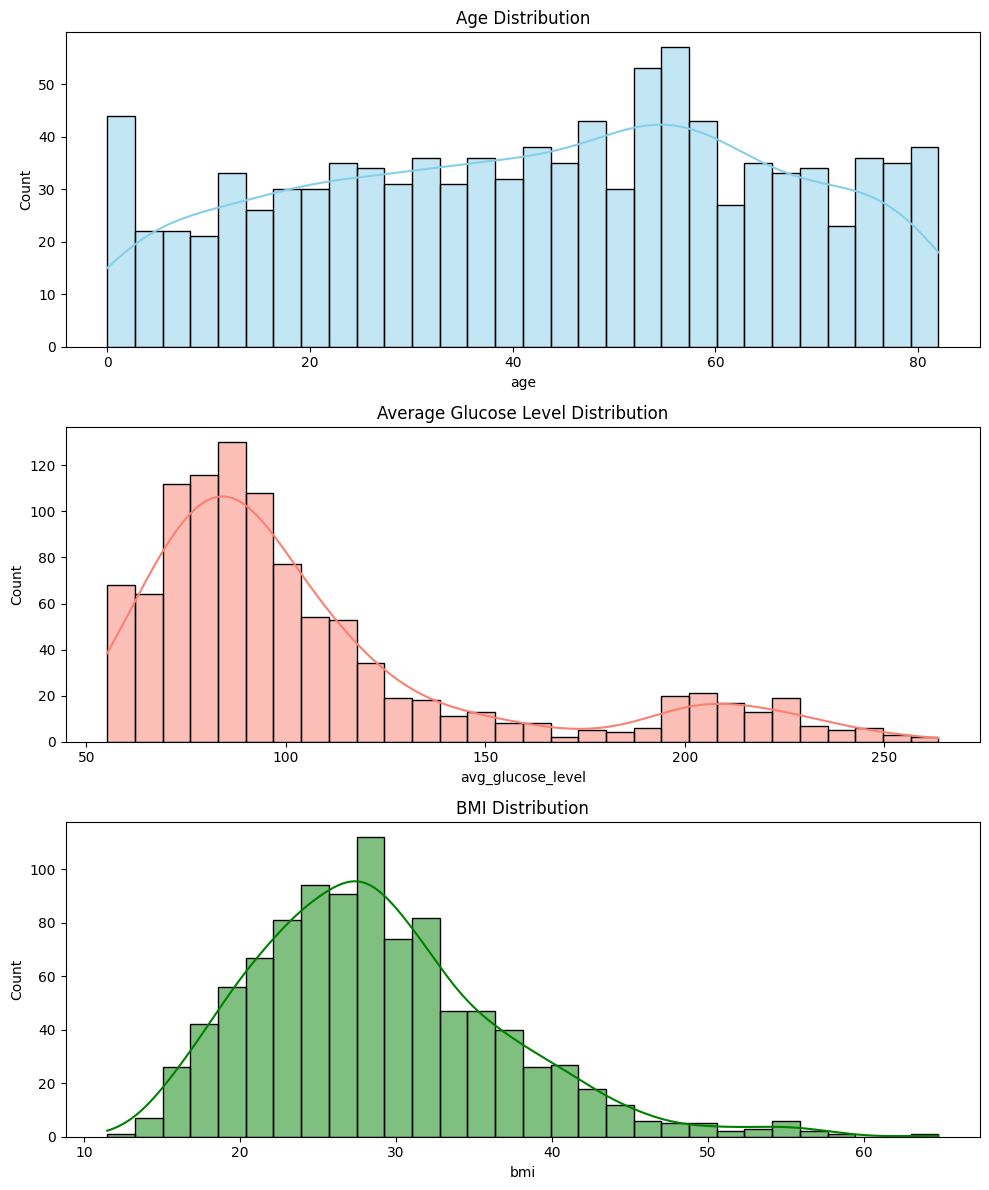

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Plot age
sns.histplot(df_test['age'], kde=True, ax=axes[0], bins=30, color='skyblue')
axes[0].set_title('Age Distribution')

# Plot avg_glucose_level
sns.histplot(df_test['avg_glucose_level'], kde=True, ax=axes[1], bins=30, color='salmon')
axes[1].set_title('Average Glucose Level Distribution')

# Plot bmi
sns.histplot(df_test['bmi'].dropna(), kde=True, ax=axes[2], bins=30, color='green')
axes[2].set_title('BMI Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

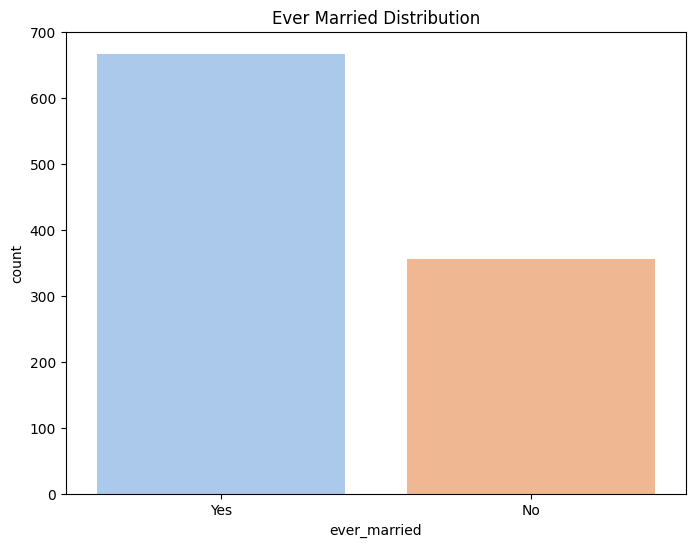

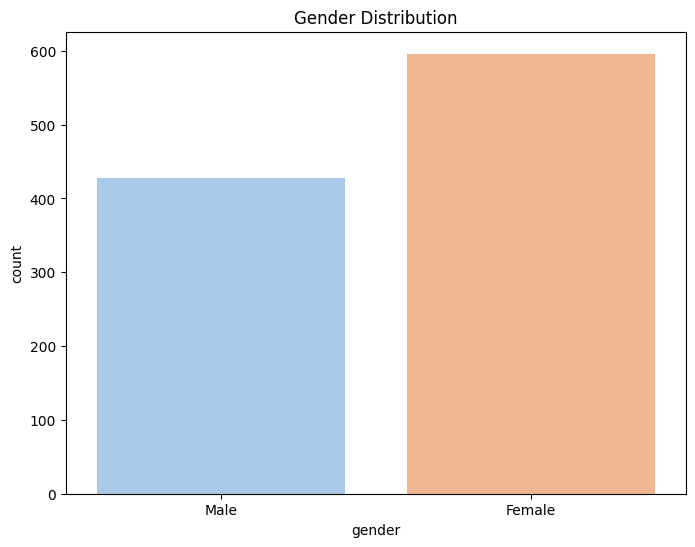

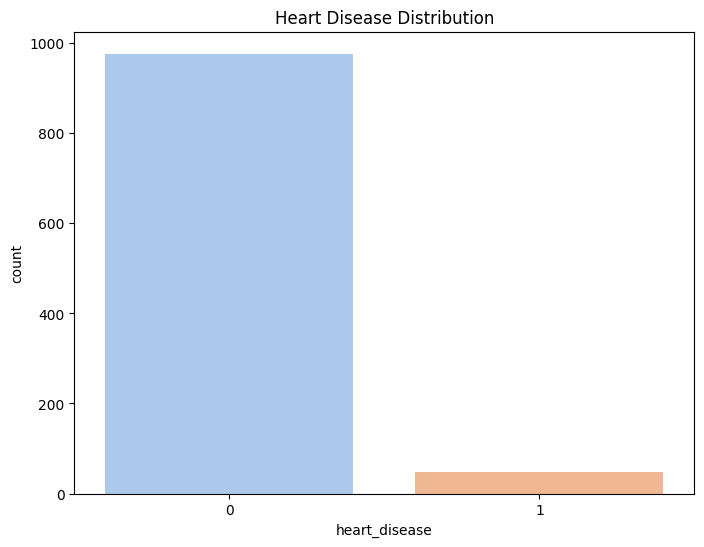

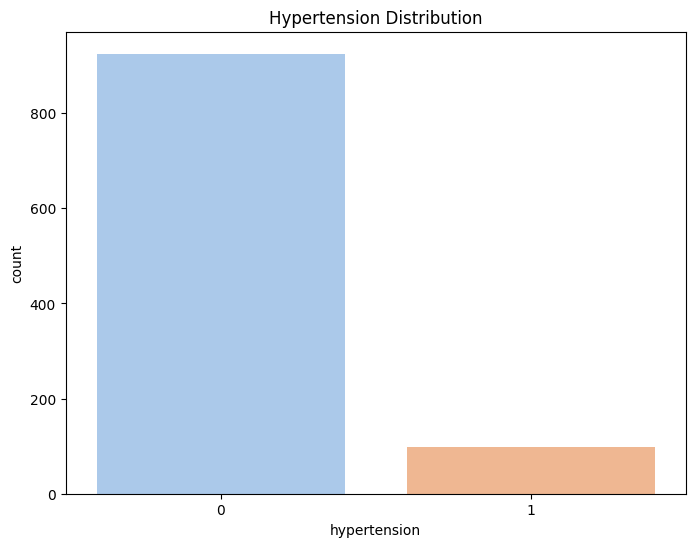

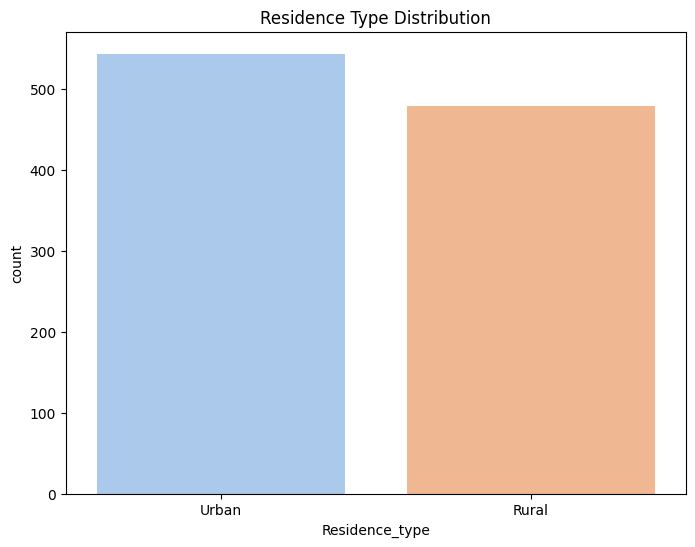

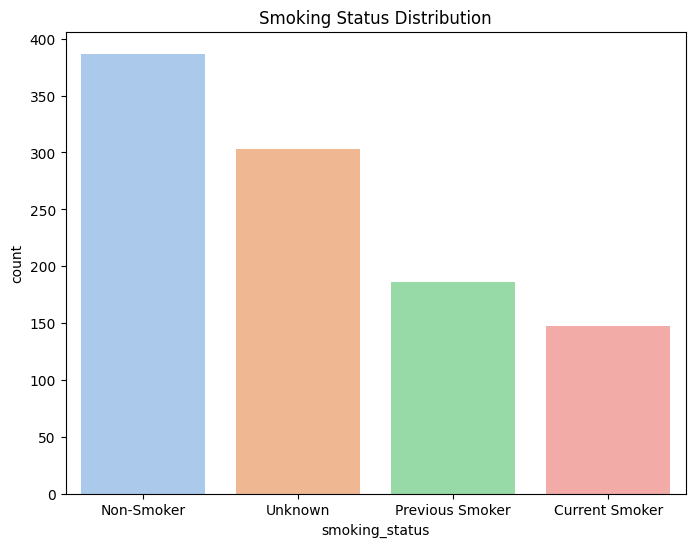

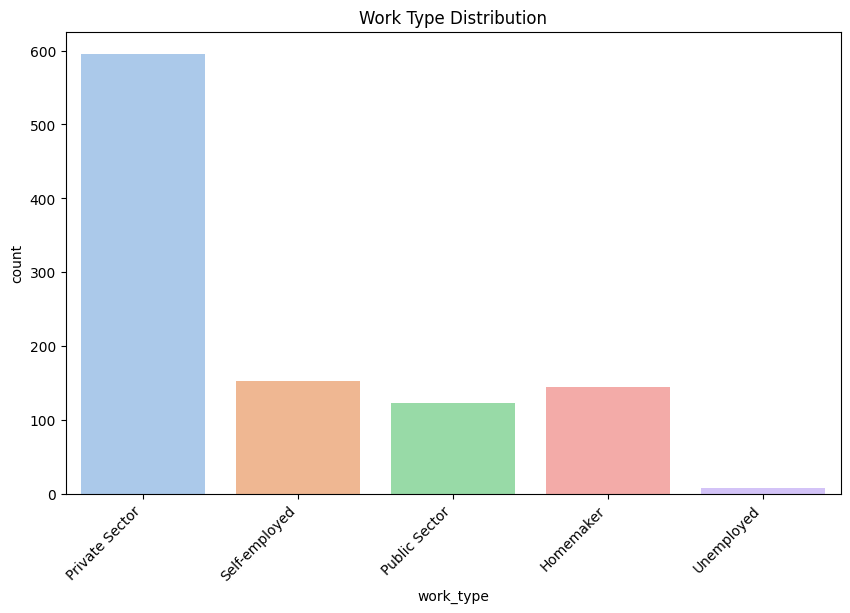

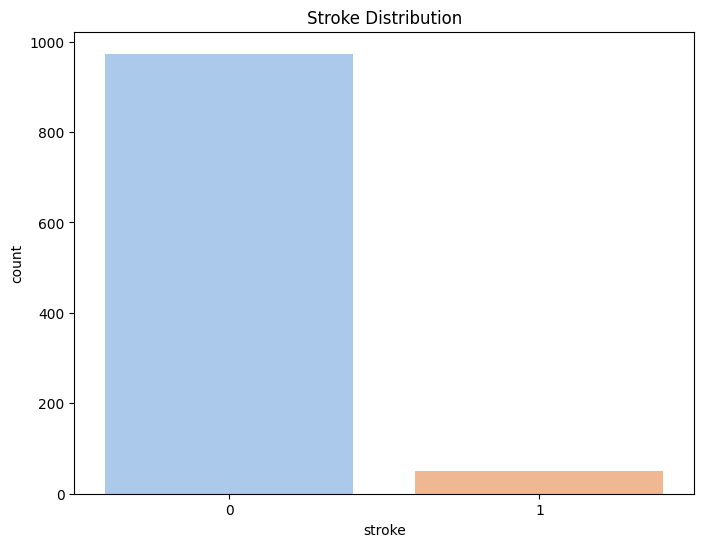

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for ever_married
plt.figure(figsize=(8, 6))
sns.countplot(x='ever_married', data=df_test, palette='pastel')
plt.title('Ever Married Distribution')
plt.show()

# Bar plot for gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df_test, palette='pastel')
plt.title('Gender Distribution')
plt.show()

# Bar plot for heart_disease
plt.figure(figsize=(8, 6))
sns.countplot(x='heart_disease', data=df_test, palette='pastel')
plt.title('Heart Disease Distribution')
plt.show()

# Bar plot for hypertension
plt.figure(figsize=(8, 6))
sns.countplot(x='hypertension', data=df_test, palette='pastel')
plt.title('Hypertension Distribution')
plt.show()

# Bar plot for Residence_type
plt.figure(figsize=(8, 6))
sns.countplot(x='Residence_type', data=df_test, palette='pastel')
plt.title('Residence Type Distribution')
plt.show()

# Bar plot for smoking_status
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking_status', data=df_test, palette='pastel')
plt.title('Smoking Status Distribution')
plt.show()

# Bar plot for work_type
plt.figure(figsize=(10, 6))
sns.countplot(x='work_type', data=df_test, palette='pastel')
plt.title('Work Type Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bar plot for stroke
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=df_test, palette='pastel')
plt.title('Stroke Distribution')
plt.show()


# **Data Visualization (Training Data)**

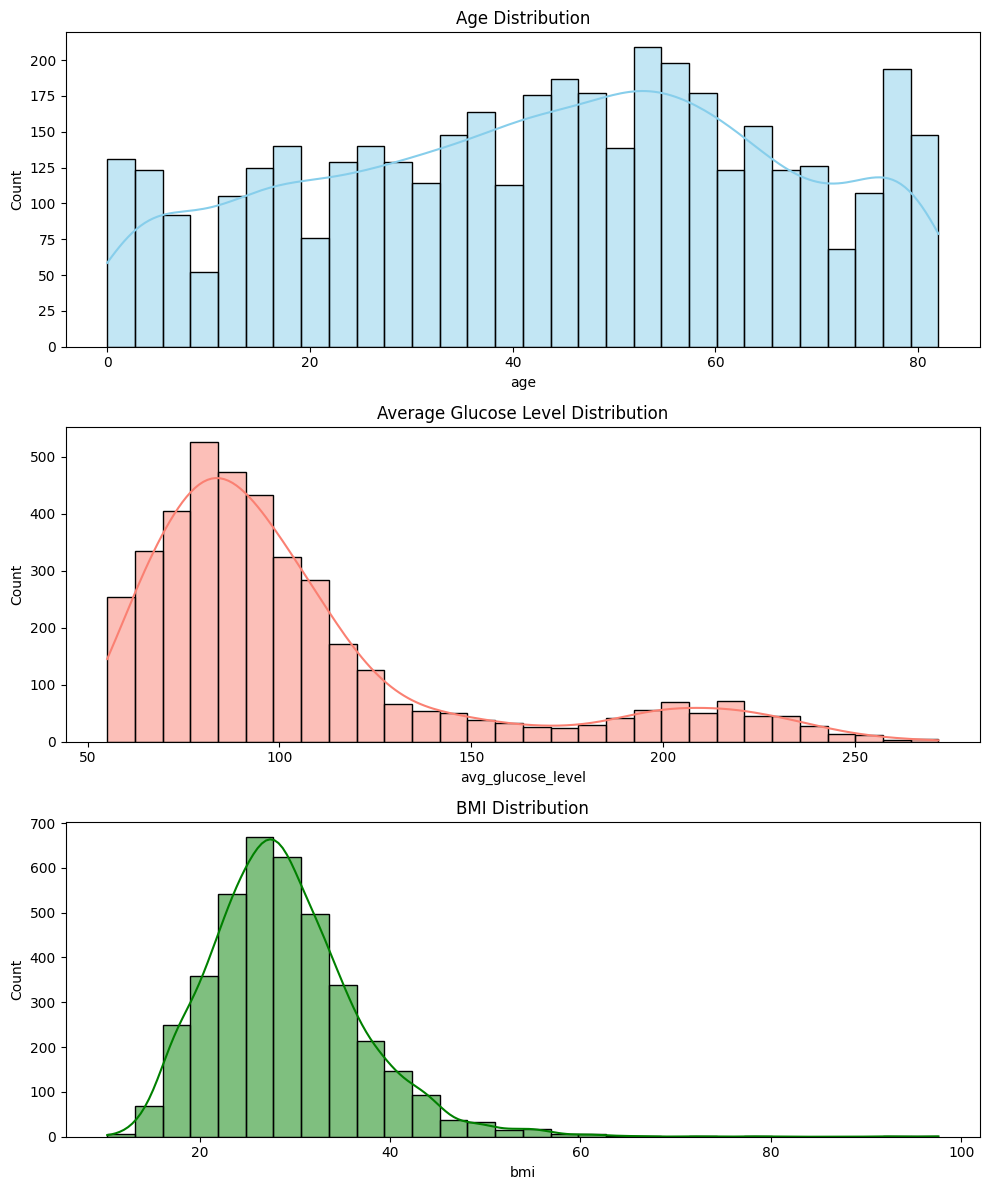

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Plot age
sns.histplot(df_train['age'], kde=True, ax=axes[0], bins=30, color='skyblue')
axes[0].set_title('Age Distribution')

# Plot avg_glucose_level
sns.histplot(df_train['avg_glucose_level'], kde=True, ax=axes[1], bins=30, color='salmon')
axes[1].set_title('Average Glucose Level Distribution')

# Plot bmi
sns.histplot(df_train['bmi'].dropna(), kde=True, ax=axes[2], bins=30, color='green')
axes[2].set_title('BMI Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

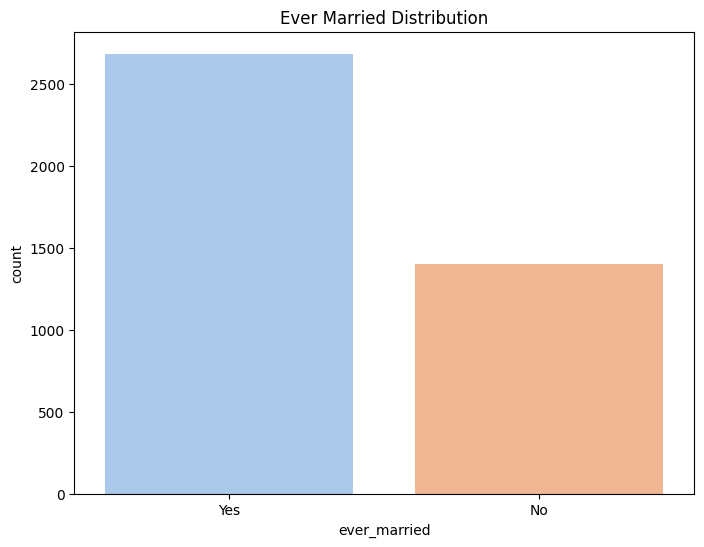

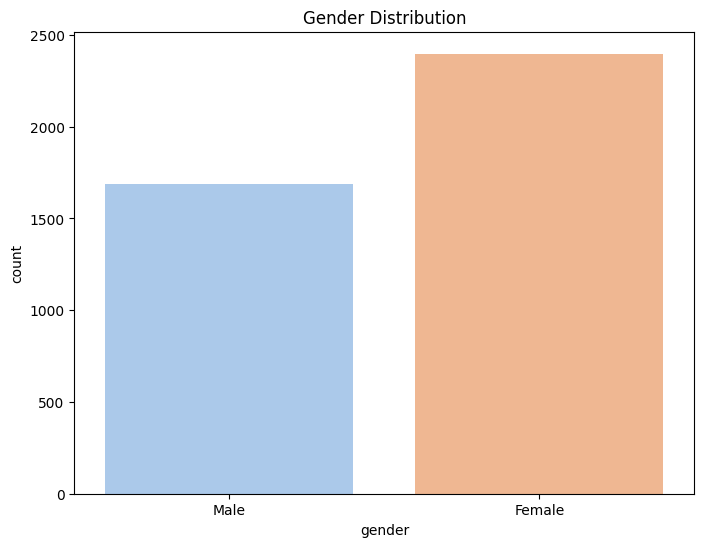

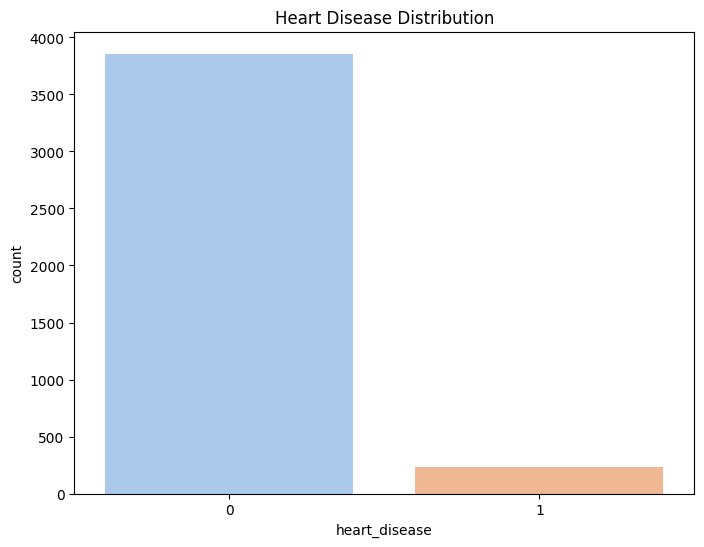

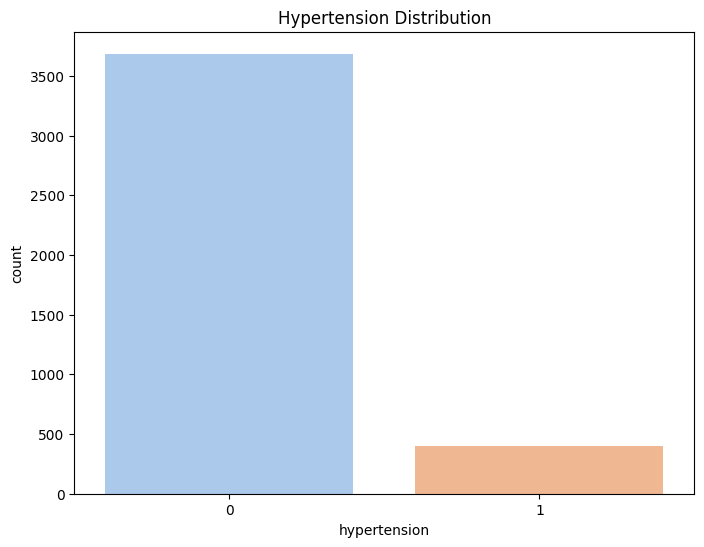

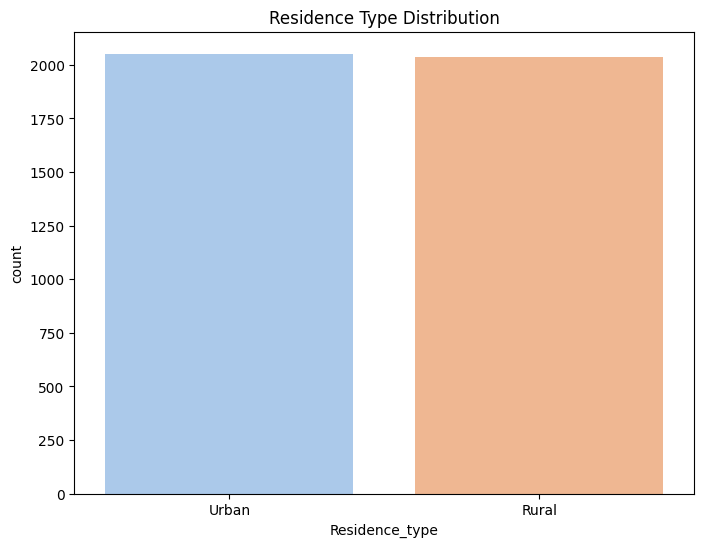

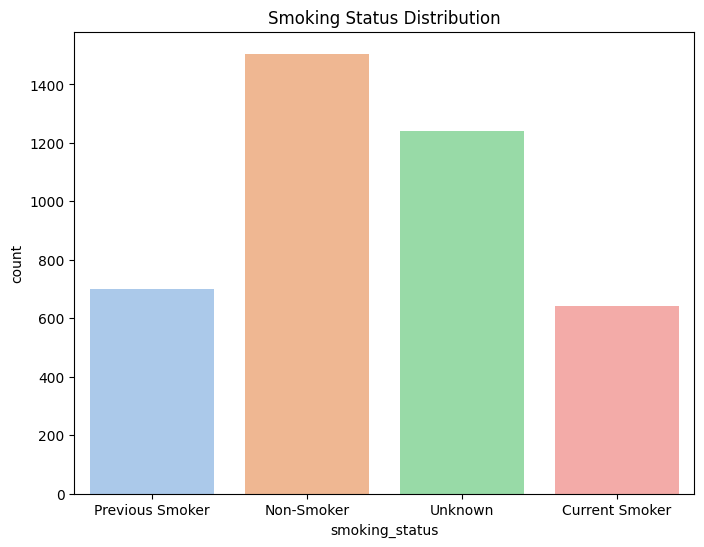

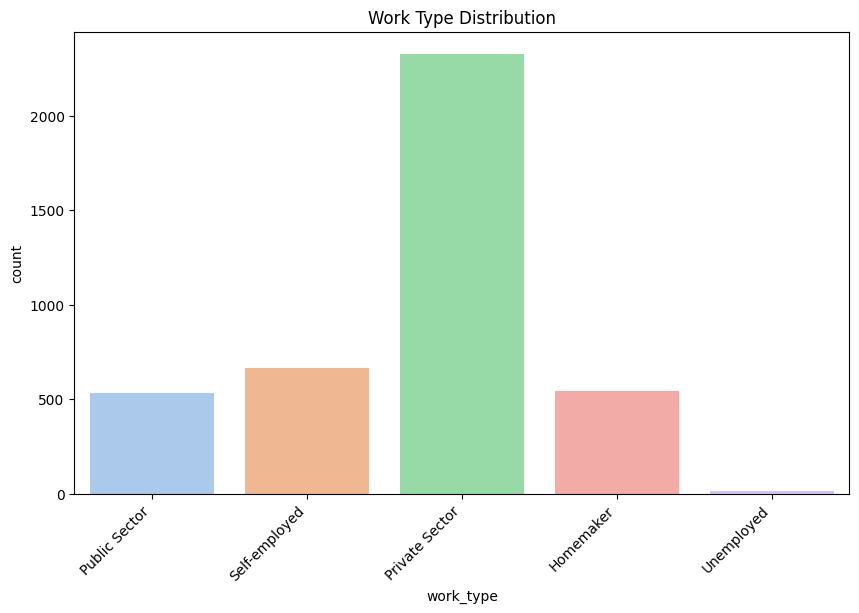

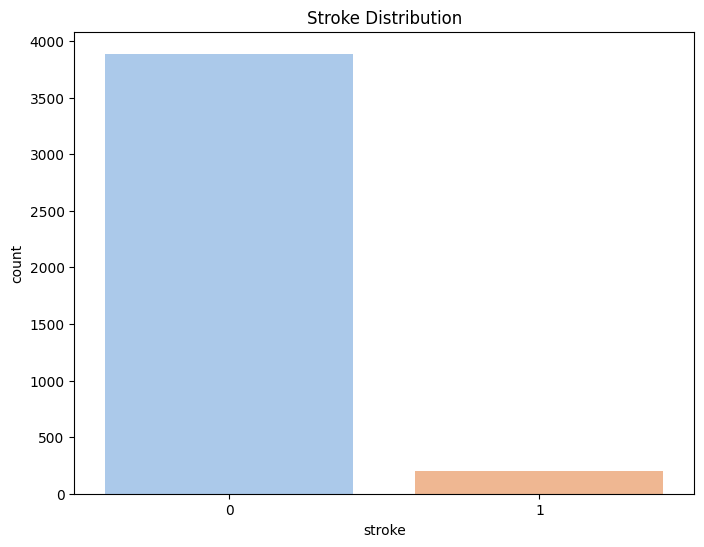

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for ever_married
plt.figure(figsize=(8, 6))
sns.countplot(x='ever_married', data=df_train, palette='pastel')
plt.title('Ever Married Distribution')
plt.show()

# Bar plot for gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df_train, palette='pastel')
plt.title('Gender Distribution')
plt.show()

# Bar plot for heart_disease
plt.figure(figsize=(8, 6))
sns.countplot(x='heart_disease', data=df_train, palette='pastel')
plt.title('Heart Disease Distribution')
plt.show()

# Bar plot for hypertension
plt.figure(figsize=(8, 6))
sns.countplot(x='hypertension', data=df_train, palette='pastel')
plt.title('Hypertension Distribution')
plt.show()

# Bar plot for Residence_type
plt.figure(figsize=(8, 6))
sns.countplot(x='Residence_type', data=df_train, palette='pastel')
plt.title('Residence Type Distribution')
plt.show()

# Bar plot for smoking_status
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking_status', data=df_train, palette='pastel')
plt.title('Smoking Status Distribution')
plt.show()

# Bar plot for work_type
plt.figure(figsize=(10, 6))
sns.countplot(x='work_type', data=df_train, palette='pastel')
plt.title('Work Type Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bar plot for stroke
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=df_train, palette='pastel')
plt.title('Stroke Distribution')
plt.show()


# **Modeling**

## Simple Linear Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_train_encoded = pd.get_dummies(df_train, columns=['Residence_type', 'gender', 'work_type', 'ever_married', 'smoking_status'], drop_first=True)
df_test_encoded = pd.get_dummies(df_test, columns=['Residence_type', 'gender', 'work_type', 'ever_married', 'smoking_status'], drop_first=True)
df_train_encoded = df_train_encoded.dropna()
df_test_encoded = df_test_encoded.dropna()

X_train = df_train_encoded.drop(['stroke','id','Unnamed: 0'], axis=1)
y_train = df_train_encoded['stroke']

X_test = df_train_encoded.drop(['stroke','id','Unnamed: 0'], axis=1)
y_test = df_train_encoded['stroke']

model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error: {mse**0.5}')
print(f'R-squared: {r2}')

Root Mean Squared Error: 0.1954482472402013
R-squared: 0.08257786792524435


This model has an R-squared value that is very close to the simple model given to us.

## Linear Model with Polynomial Expansion

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

df_train_clean = df_train.dropna()
df_test_clean = df_test.dropna()

count = 10
arr = [0]*count
arr2 = [0]*count
vars = ['age', 'hypertension',	'heart_disease', 'avg_glucose_level',	'bmi']
X_train_numeric = df_train_clean.loc[:,vars]
X_test_numeric = df_test_clean.loc[:,vars]



vars2 = ['Residence_type', 'gender', 'work_type', 'ever_married', 'smoking_status']
X_train_catigorical = df_train_clean.loc[:,vars2]
X_test_catigorical = df_test_clean.loc[:,vars2]


for i in range(count):
  degree = i+1

  poly = PolynomialFeatures(degree=degree, include_bias=False)
  X_train_numerical_poly = poly.fit_transform(X_train_numeric)
  X_test_numerical_poly = poly.fit_transform(X_test_numeric)

  X_train_combined = pd.concat([pd.DataFrame(X_train_numerical_poly, columns=poly.get_feature_names_out(vars)), X_train_catigorical.reset_index(drop=True)], axis=1)
  X_test_combined = pd.concat([pd.DataFrame(X_test_numerical_poly, columns=poly.get_feature_names_out(vars)), X_test_catigorical.reset_index(drop=True)], axis=1)


  X_train = pd.get_dummies(X_train_combined, columns=vars2, drop_first=True)
  X_test = pd.get_dummies(X_test_combined, columns=vars2, drop_first=True)


  y_train = df_train_clean['stroke']
  y_test = df_test_clean['stroke']

  model = LinearRegression()

  # Fit the model to the training data
  model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Evaluate the model's performance
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  arr[i] = r2
  arr2[i] = mse

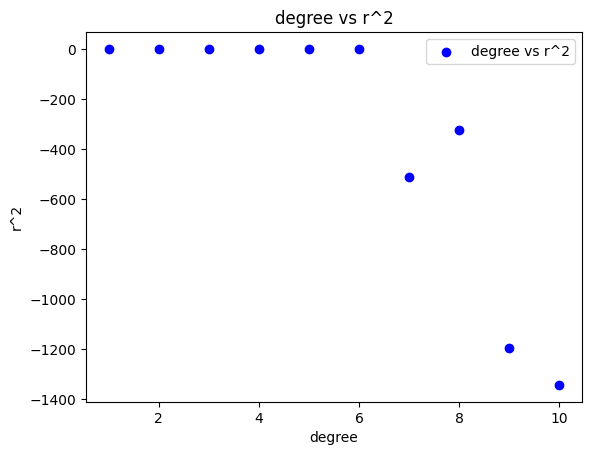

In [ ]:
# Extract x and y coordinates from the subset
x = arr

y = [0]*count
for i in range(count):
  y[i] = i+1

# Create a scatter plot
plt.scatter(y, x, label='degree vs r^2', color='blue')
plt.xlabel('degree')
plt.ylabel('r^2')
plt.title('degree vs r^2')
plt.legend()
plt.show()

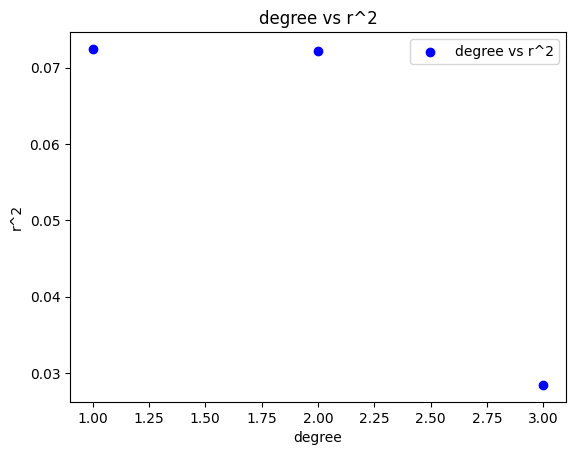

In [ ]:
# Only show positive elements
x = arr[:3]

y = [0]*len(x)
for i in range(len(x)):
    y[i] = i+1

# Create a scatter plot
plt.scatter(y, x, label='degree vs r^2', color='blue')
plt.xlabel('degree')
plt.ylabel('r^2')
plt.title('degree vs r^2')
plt.legend()
plt.show()

In [ ]:
# Positive R-squared values:

print(x[0])
print(x[1])
print(x[2])

0.07243762206367976
0.07215015399932134
0.028429381168642687


None of the positive R-squared values here are any higher than that of the simple linear model from earlier.

## Classification Models

In [ ]:
# Data processing

# For these models, we will maxmin normalize each numeric variable first

def maxmin(z): # maxmin normalization function
    z = (z-min(z))/(max(z)-min(z))
    return(z)

df_train_encoded = pd.get_dummies(df_train, columns=['Residence_type', 'gender', 'work_type', 'ever_married', 'smoking_status'], drop_first=True)
df_test_encoded = pd.get_dummies(df_test, columns=['Residence_type', 'gender', 'work_type', 'ever_married', 'smoking_status'], drop_first=True)
df_train_encoded = df_train_encoded.dropna() # drop NAs from train set
df_test_encoded = df_test_encoded.dropna() # drop NAs from test set

X_train = df_train_encoded.drop(['stroke','id','Unnamed: 0'], axis=1) # keep only predictors in X_train
y_train = df_train_encoded['stroke'] # keep only target variable in y_train

X_test = df_test_encoded.drop(['stroke','id','Unnamed: 0'], axis=1) # keep only predictors in X_test
y_test = df_test_encoded['stroke'] # keep only target variable in y_test

# Normalize predictors (this will not affect one-hot encoded vars, as these are already in range 0-1):
X_train = X_train.apply(maxmin)
X_test = X_test.apply(maxmin)

In [ ]:
# LogisticRegression from sklearn.linear_model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Logistic Regression')
print(f'Root Mean Squared Error: {mse**0.5}')
print(f'R-squared: {r2}')

Logistic Regression
Root Mean Squared Error: 0.19681459216763408
R-squared: -0.040296924708377535


In [ ]:
# KNeighborsClassifier from sklearn.neighbors

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score

# Determine optimal k:
k_bar = 15 # ran this already with k_bar = 70 and after about 15 the MSEs were all the same
k_grid = np.arange(1,k_bar) # The range of ks to consider
MSE = np.zeros(k_bar-1)
for k in range(k_bar-1):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    MSE[k] = mean_squared_error(y_test,y_hat)

MSE_min = np.min(MSE)
min_index = np.where(MSE==MSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k

Text(0.5, 0, 'k')

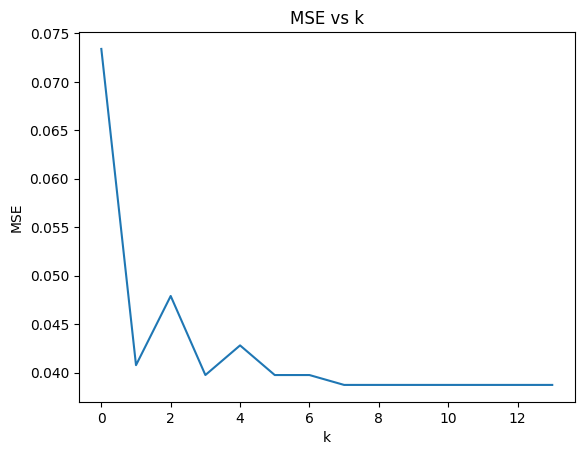

In [ ]:
plt.plot(np.arange(0,k_bar-1),MSE)
plt.title('MSE vs k')
plt.ylabel('MSE')
plt.xlabel('k')

In [ ]:
# KNN with k = 8 (optimal model)

model = KNeighborsClassifier(n_neighbors=8)
knn_star = model.fit(X_train,y_train)
y_hat_knn = knn_star.predict(X_test)

print('KNN Classifier')
print(f'Root Mean Squared Error: {MSE[7]**0.5}')

KNN Classifier
Root Mean Squared Error: 0.19681459216763408


The above two classifier models are only predicting 0s for the stroke variable, as there is less error when every prediction is 0 than when they predict any 1s at all. Thus, they have the same RMSEs, and they output the same predictions that we would get from just predicting no stroke every time.